In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [38]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

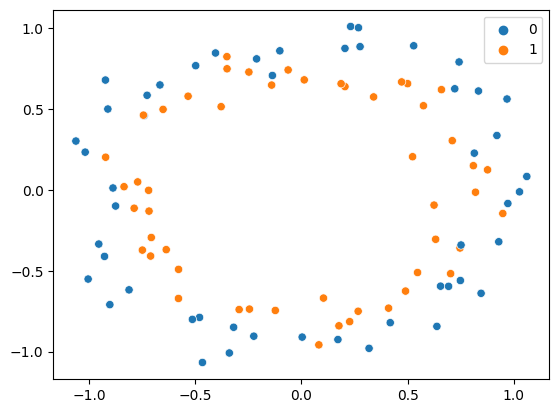

In [39]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [10]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500, verbose=0)

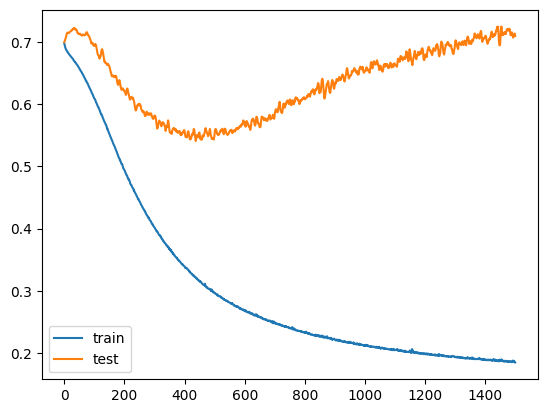

In [13]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


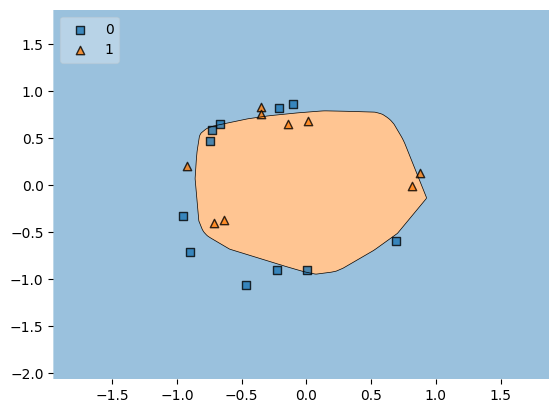

In [14]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [62]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 256)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,329 (75.50 KB)

 Trainable params: 19,329 (75.50 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [66]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.4070 - loss: 0.6961 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5516 - loss: 0.6907 - val_accuracy: 0.3500 - val_loss: 0.6969
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5195 - loss: 0.6902 - val_accuracy: 0.3500 - val_loss: 0.6986
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5773 - loss: 0.6878 - val_accuracy: 0.3500 - val_loss: 0.6993
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5719 - loss: 0.6880 - val_accuracy: 0.4000 - val_loss: 0.6984
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4953 - loss: 0.6908 - val_accuracy: 0.4500 - val_loss: 0.6985
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5430 - loss: 0.6893 - val_accuracy: 0.4500 - val_loss: 0.6983
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5562 - loss: 0.6859 - val_accuracy: 0.4500 - 

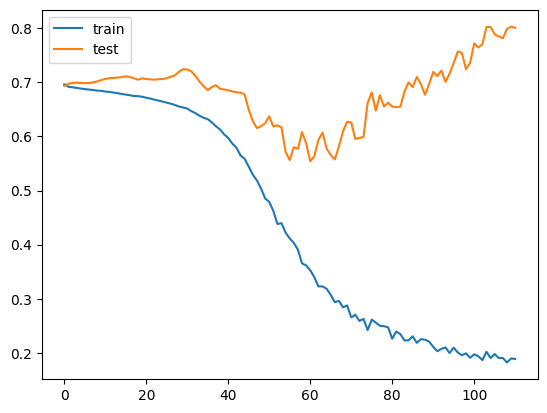

In [67]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


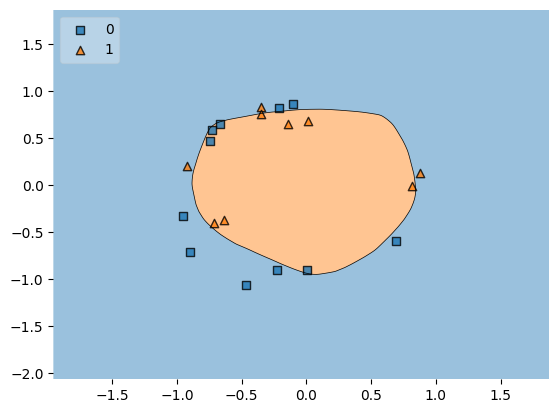

In [68]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [69]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [70]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [72]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.4898 - loss: 0.6954 - val_accuracy: 0.4000 - val_loss: 0.6951
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4820 - loss: 0.6936 - val_accuracy: 0.4000 - val_loss: 0.6959
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5703 - loss: 0.6922 - val_accuracy: 0.4000 - val_loss: 0.6964
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5523 - loss: 0.6916 - val_accuracy: 0.4500 - val_loss: 0.6974
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6117 - loss: 0.6898 - val_accuracy: 0.3000 - val_loss: 0.6984
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5523 - loss: 0.6894 - val_accuracy: 0.3000 - val_loss: 0.6985
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6305 - loss: 0.6886 - val_accuracy: 0.2500 - val_loss: 0.6997
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5930 - loss: 0.6883 - val_accuracy: 0.3500 - 

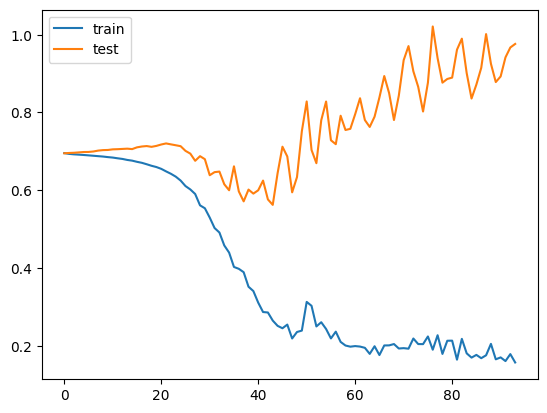

In [73]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()